.ipynb for Jupyter notebook

.py for Python

# Simple Linear Regression
1. Convert cell to code - ESC, Y
2. Convert cell to markdown - ESC, M

## The Below Steps, are common and the main steps in creating all Models

Step 1 - Data Ingestion (Read the Dataset)

Step 2 - Performing Basic Data Quality Checks

Step 3 - Separate X & Y

Step 4 - Create a Linear Regression Model

Step 5 - Model Evaluation

Step 6 - Out of Sample Prediction

### Steps in Brief
1. Data Ingestion and EDA - Read data and visualize, if neccessary
2. Perform Basic Data Quality Checks -> If missing values, duplicates
3. Separate X (Predictor) and Y (Target)
4. Fit the Model - Straight line fitted for X and Y
5. Evaluate the Model - Model Metrics, RMSE, MAE, MAPE, R^2 Score, R2 > 0.8, Model is good
6. Out of Sample Prediction - Estimate Value for any Model

In [2]:
# Ignore non harmful warnings

from warnings import filterwarnings

filterwarnings("ignore")

Step 1 - Data Ingestion (Read the Dataset)

In [3]:
import pandas as pd

df = pd.read_csv("50_Startups.csv")

In [4]:
df.head()
# One-hot encoding for categorical variables

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Visualize the data using pairplot

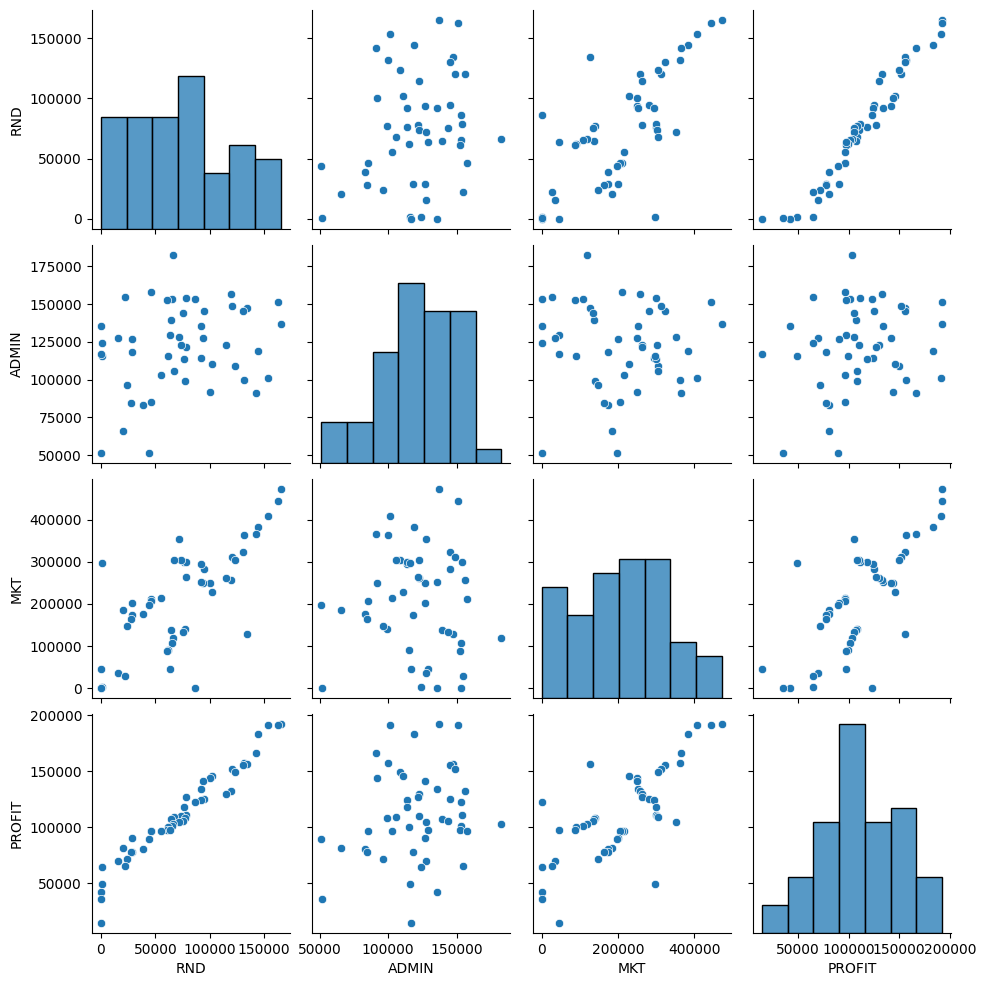

In [5]:
import seaborn as sns

sns.pairplot(df)

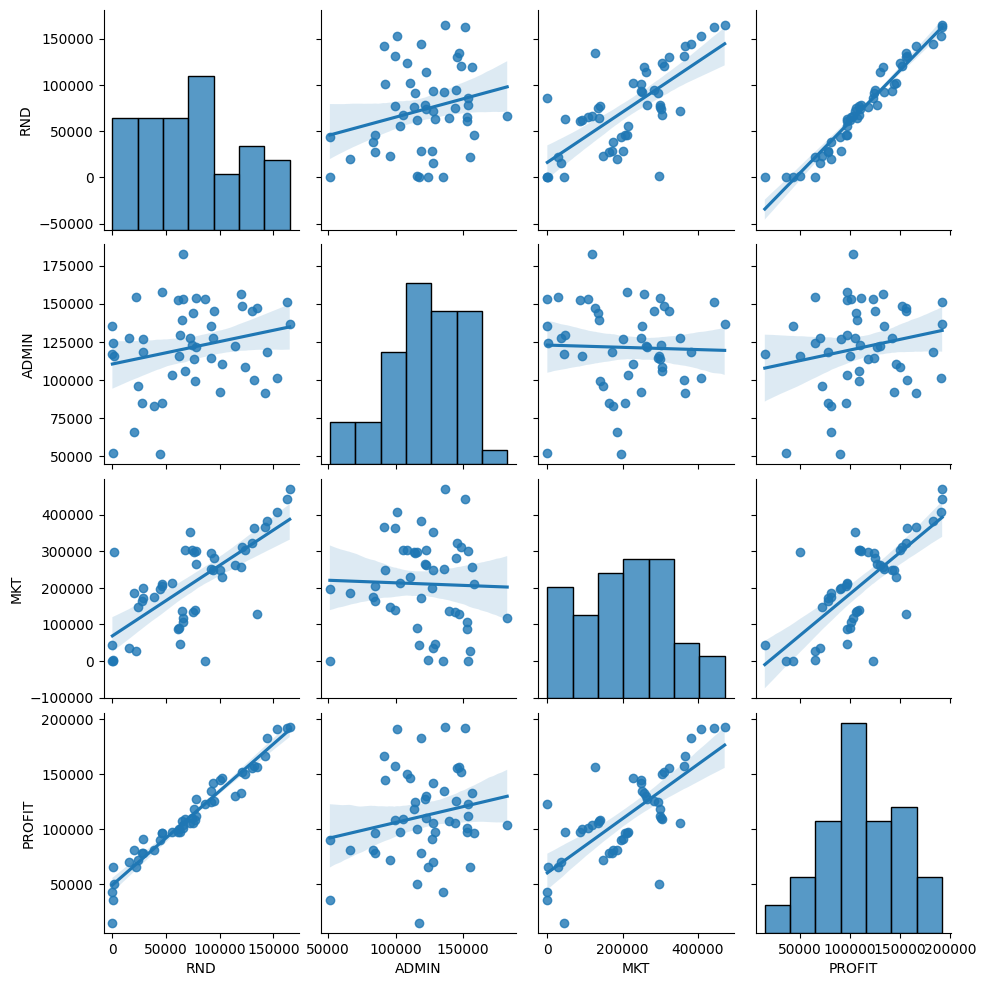

In [6]:
sns.pairplot(df, kind="reg")
# One-hot encoding for categorical variables

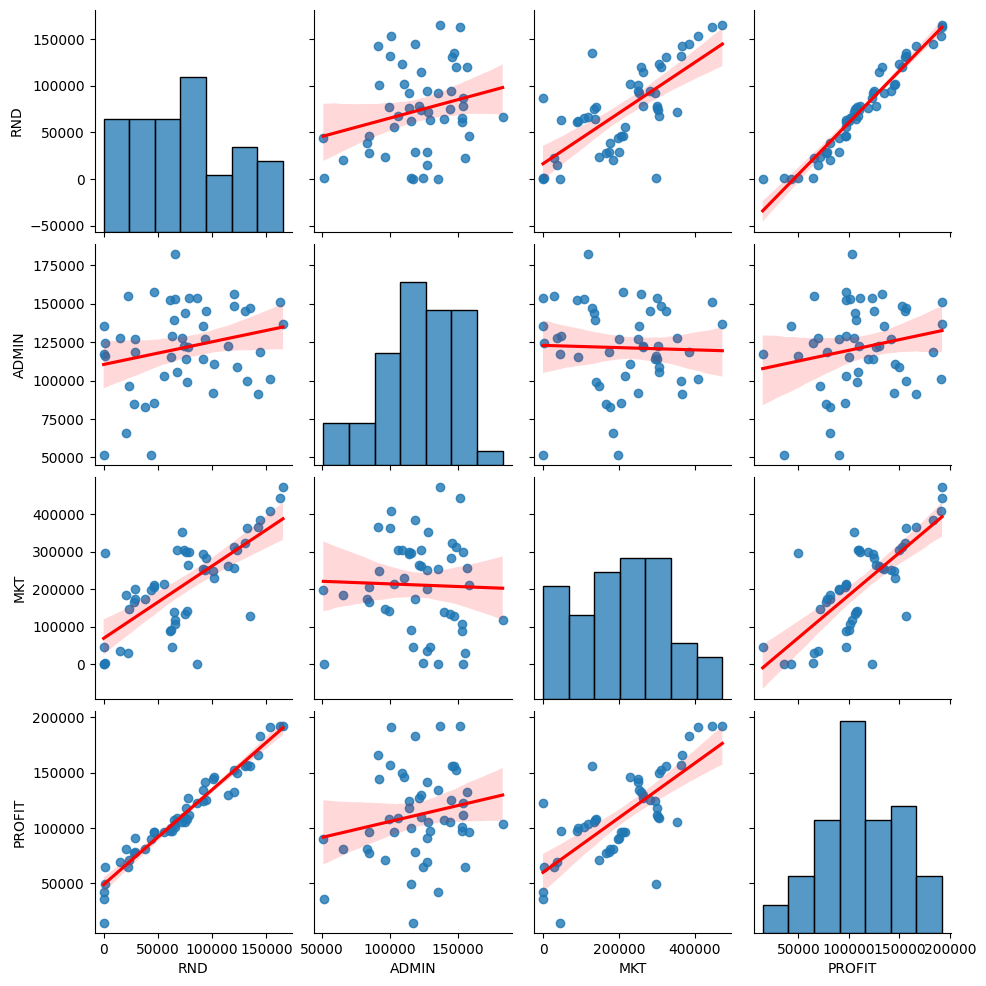

In [ ]:
sns.pairplot(df, kind="reg", plot_kws={"line_kws": {"color": "red"}})
# Changing the color of the regression line
# kws are keyword arguments that are passed to the underlying sns.pairplot function

<Axes: xlabel='RND', ylabel='PROFIT'>

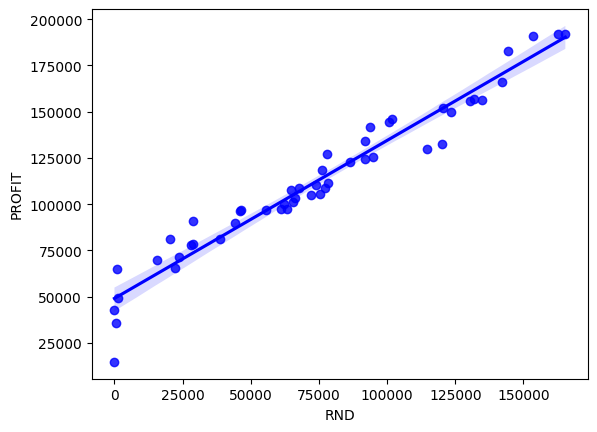

In [9]:
sns.regplot(x="RND", y="PROFIT", data=df, color="blue")

<Axes: xlabel='RND', ylabel='PROFIT'>

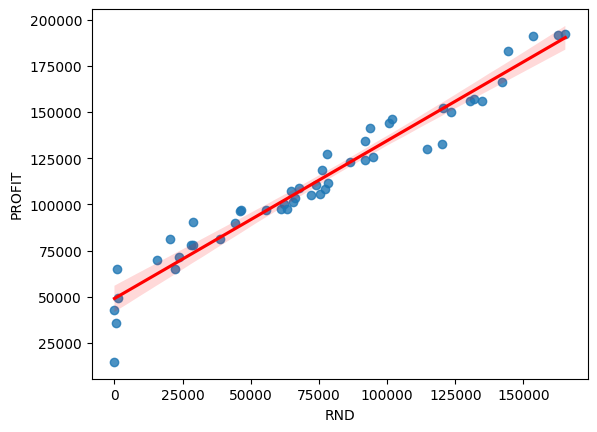

In [10]:
sns.regplot(x="RND", y="PROFIT", data=df, line_kws={"color": "red"})
# Changing the color of the regression line

In [ ]:
df.corr(numeric_only=True)
# Correlation matrix for numeric variables
# to check the correlation between variables

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


## Problem Statement - Predit PROFIT based on RND
1. Profit ~ RND ( ~ is dependent)
2. PROFIT is Target Feature, RND is Predictor
3. PROFIT_pred (_pred is prediction) = B0 + B1 * RND

Step 2 - Performing Basic Data Quality Checks

In [12]:
df.info()
# Information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [14]:
df.isna().sum()
# Checking for missing values in the DataFrame

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [17]:
df.duplicated().sum()
# Checking for duplicate rows in the DataFrame

np.int64(0)

### This shows that there are no missing values or duplicate rows in the DataFrame
Hence, this data is clean

Step 3 - Separate X & Y

Predictor is X-Axis, Target is the Y-Axis

In [18]:
X = df[["RND"]]
Y = df["PROFIT"]
# Splitting the DataFrame into features (X) and target variable (Y)

In [ ]:
X.head()
# Displaying the first few rows of the features DataFrame

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [21]:
Y.head()
# Displaying the first few rows of target variable

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: PROFIT, dtype: float64

Step 4 - Create a Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

# Creating a Linear Regression model

In [23]:
model = LinearRegression()
# Fitting the model to the data
model.fit(X, Y)
# Making predictions using the model
# Predicting the target variable using the features

LinearRegression()

In [ ]:
model.intercept_
# Intercept of the linear regression model
# intercept is used to find B0

np.float64(49032.89914125215)

In [ ]:
model.coef_
# Coefficients of the linear regression model
# coef is used to find B1

array([0.85429137])

## PROFIT_pred = 49032.9 + 0.8543 * RND
## IF RND increases by 1 USD then PROFIT will increase by 0.8543 approx
## IF RND increases by 1000 USD then PROFIT will increase by 854.3 approx

Step 5 - Model Evaluation

In [26]:
model.score(X, Y)
# R-squared value of the model
# R-squared value indicates the proportion of variance in the target variable that can be explained by the features

0.9465353160804393

In [28]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)

In [30]:
ypred = model.predict(X)
# Making predictions using the model

In [38]:
def evaluate_model(model, x, y):
    # Function to evaluate the model's performance
    ypred = model.predict(x)
    # Making predictions using the model

    # Calculating evaluation metrics
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mse = mean_squared_error(y, ypred)
    r2 = r2_score(y, ypred)

    # Returning the evaluation metrics
    print(f"RMSE: {rmse: .2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R2: {r2: .2%}")

    # :.2f formats the float to 2 decimal places
    # :.2% formats the float to percentage with 2 decimal places

In [39]:
evaluate_model(model, X, Y)
# Evaluating the model's performance using the defined function

RMSE:  9226.10
MAE: 6910.98
MSE: 85120931.33
R2:  94.65%


If R2 Score > 0.8

Above model is a good model

Hence, this model can be used for out of sample prediction

Step 6 - Out of Sample Prediction

In [40]:
X.values[:5]
# Displaying the first 5 rows of the features as numpy array

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

In [ ]:
# _ is used in place of ,
rnd = 1_50_000
# Predicting profit for a given R&D spend
profit = model.predict([[rnd]])
print(f"Predicted profit for R&D spend of {rnd} is {profit[0]:.2f}")
# Displaying the predicted profit for the given R&D spend

Predicted profit for R&D spend of 150000 is 177176.60


In [42]:
rnd = 2_79_547
profit = model.predict([[rnd]])
print(f"Predicted profit for R&D spend of {rnd} is {profit[0]:.2f}")

Predicted profit for R&D spend of 279547 is 287847.49


In [43]:
rnd = 60_000
profit = model.predict([[rnd]])
print(f"Predicted profit for R&D spend of {rnd} is {profit[0]:.2f}")

Predicted profit for R&D spend of 60000 is 100290.38
